# Monte Carlo Methods for Estimation

Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. 

First we will see how Monte Carlo Methods are used for estimation and for this we will be taking the most common example of the estimation of value of **Pi** .  

To estimate the value of **Pi** we will be taking a circle drawn inside a square and we will randomly try throwing darts , in the form of random numbers and we will approximate that the number lies inside the circle or not. So, this way we will get the number of points which lie inside circle and the ones which do not. 

So,  
Approximation of value of pi :  $\frac{Area of circle}{Area of square}$ 

$$=\frac{\pi r^2}{4 * r^2}$$ 

$$=\frac{\pi}{4}$$  

Approximate of value of pi = $4 * \frac{Area of circle}{Area of square}$

The approximate value of Pi : 3.1332
The actual value of Pi : 3.141592653589793


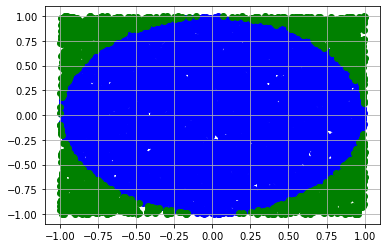

In [19]:
%matplotlib inline
from numpy import random
import numpy as np
import matplotlib.pyplot as plt

# darts
N = 10000

# lists which will take the x and y values of random variables and which lie inside circle  
circlex = []
circley = []  

# lists which will take the x and y values of random variables and which lie inside square  
squarex = []
squarey = []  

i=0
while i<= N:
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    if(x**2+y**2<=1):
        circlex.append(x)
        circley.append(y)
    else:
        squarex.append(x)
        squarey.append(y)
    i+=1


pi = 4*len(circlex)/float(N)  

print("The approximate value of Pi :",pi)
print("The actual value of Pi :",np.pi)

# Visualising  

plt.grid()
plt.scatter(circlex,circley,color='b')
plt.scatter(squarex,squarey,color='g')


**Standard Deviation** 

As you will remember, the square root of the variance is the standard deviation, which gives a measure of the variation expected in the individual sample.


In [18]:
# Standard Deviation in value of Pi

stnd = len(circlex)*(4-np.pi)**2+len(squarex)*(0-np.pi)**2

stddev = np.sqrt(stnd).round(3)
stddev

163.635

# Estimation of Error

We will estimate the error which has come in the value of pi estimated using Monte Carlo method

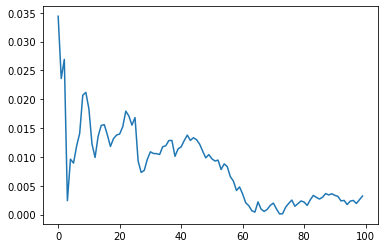

In [38]:
# Estimation of Error
%matplotlib inline
import matplotlib.pyplot as plt

result = []
avg_pi_values = []
def exp(n=10000):
    points= [(random.uniform(-1,1),random.uniform(-1,1))for i in range(1000)]
    points_inside_circle=[(x,y) for x,y in points if x**2+y**2<=1]
    return 4* len(points_inside_circle)/len(points)

for _ in range(100):
    result.append(exp())
    avg_pi = sum(result)/len(result)
    avg_pi_values.append(avg_pi)
    
avg_pi_error = [abs(np.pi-pi) for pi in avg_pi_values]

# Visualising avgerage pi errors
plt.plot(avg_pi_error)


# Monte Carlo Integration

Monte Carlo methods are numerical techniques which rely on random sampling to approximate their results . Monte Carlo Integration applies this process to numerical estimation of integrals.Monte Carlo integration is a technique for numerical integration using random numbers. It is a particular Monte Carlo method that numerically computes a definite integral.Monte Carlo randomly chooses points at which the integrand is evaluated. This method is particularly useful for higher-dimensional integrals.  

So, in simple words it can be said that Monte Carlo Integration is used for definite integration .

# How is Monte Carlo Integration Done ?

Here we will look at the method of doing Monte Carlo .  

In order to integrate a function over a complicated domain D, Monte Carlo integration picks random points over some simple domain $D^{'}$ which is a superset of D, checks whether each point is within D, and estimates the area of D (volume, n-dimensional content, etc.) as the area of $D^{'}$ multiplied by the fraction of points falling within D.  

Now, we pick up N randomly distributed points $x_{1},x_{2},x_{3},......x_{N},$ in multidimensional volume V to determine the integral of function f in this volume gives a result  

$\int_ f dv \approx V<f>\pm V \sqrt \frac{<f^{2}>-<f>^{2}}{N}$  

where, 

$<f> \equiv \frac{1}{N}\sum_{i=1}^{N}f(x_{i})$

$<f^{2}>\equiv \frac{1}{N}\sum_{i=1}^{N}f^{2}(x_{i})$  

Now , we will look at the implementation of Monte Carlo . We take $\sin x$ as the function for integration from 0 to $\pi$ .

In [ ]:
# Monte Carlo Integration 

from scipy import random 
import numpy as np

#Limits of integration 
a = 0
b = np.pi

# No of random variables
N=1000

# Setting up random variable
xrand = random.uniform(a,b,N)

# Implementing the given function of integration
def func(x):
    return np.sin(x)
integral =0.0 

for i in range(N):
    integral += func(xrand[i])

# Final answer of integration
answer = (b-a)/float(N)*integral
print('The integral from o to pi of sin(x):' ,answer)

In [ ]:
# Visualising the answer using Monte Carlo Integration

from scipy import random 
import numpy as np
import matplotlib.pyplot as plt

#Limits of integration 
a = 0
b = np.pi

# No of random variables
N=1000

areas =[]
for i in range(N):
    
# Setting up random variable
    xrand = random.uniform(a,b,N)

# Implementing the given function of integration
    def func(x):
        return np.sin(x)
    integral =0.0 

    for i in range(N):
        integral += func(xrand[i])

# Final answer of integration
    answer = (b-a)/float(N)*integral
    areas.append(answer)

plt.title('Distribution of Areas Calculated')
plt.hist(areas,bins=30, ec = 'black')
plt.xlabel('Areas')